# Pandas powerful Python data analysis toolkit

## 10 minutes to pandas
### this is a short introduction to pandas, geared mainly for new users. You can see more complex recipes in the 
https://pandas.pydata.org/pandas-docs/stable/user_guide/cookbook.html#cookbook

In [4]:
import numpy as np
import pandas as pd

## Object creation
Creating a Series by passing a list of values, letting pandas create a default integer index

In [2]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Creating a DataFrame by passing a NumPy array, with a datetime index and labeled columns 

In [3]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [5]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns = list('ABCD'))
df

,A,B,C,D
2013-01-01,-0.192914,0.959854,1.268042,1.796079
2013-01-02,-0.213068,1.591035,0.635077,-0.404746
2013-01-03,1.035954,-0.469996,-0.029455,-0.871430
2013-01-04,0.415059,0.385848,1.747248,0.336623
2013-01-05,0.608917,-0.320133,-0.074571,-1.131054
2013-01-06,0.275156,-1.421548,0.805026,0.076590


Creating a DataFrame by passing a dict of objects that can be converted to series-like

In [8]:
df2 = pd.DataFrame({'A':1.,
                    'B': pd.Timestamp('20130102'),
                    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                    'D': np.array([2] * 4, dtype='int32'),
                   'E': pd.Categorical(["test", "train", "test", "train"]),
                   'F': 'foo'})
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,2,test,foo
1,1.0,2013-01-02,1.0,2,train,foo
2,1.0,2013-01-02,1.0,2,test,foo
3,1.0,2013-01-02,1.0,2,train,foo


The columns of the resulting DataFrame have different dtypes

In [9]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

## Viewing data
Here is how to view the top and bottom rows of the frame

In [10]:
df.head()

,A,B,C,D
2013-01-01,-0.192914,0.959854,1.268042,1.796079
2013-01-02,-0.213068,1.591035,0.635077,-0.404746
2013-01-03,1.035954,-0.469996,-0.029455,-0.871430
2013-01-04,0.415059,0.385848,1.747248,0.336623
2013-01-05,0.608917,-0.320133,-0.074571,-1.131054


In [11]:
df.tail(3)

,A,B,C,D
2013-01-04,0.415059,0.385848,1.747248,0.336623
2013-01-05,0.608917,-0.320133,-0.074571,-1.131054
2013-01-06,0.275156,-1.421548,0.805026,0.076590


Display the index, columns

In [12]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [13]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

DataFrame.to_numpy() gives a NumPy representation of the underlying data. Note that this can be an expensive operation when your DataFrame has columns with different data tyes, which comes down to a fundamental difference between pandas and NumPy: *NumPy arrays have one dtype for the entire array, while pandas DataFrames have one dtype per column*. When you call DataFrame.to_numpy(), pandas will find the NumPy dtype that can hold all of the dtypes in the DataFrame. This may end up being object, which requires casting every value to Python Object.

For df, out DataFrame of all floating-point values, DataFrame.to_numpy() is fast and doesn't require copying data

In [14]:
df.to_numpy()

array([[-0.19291402,  0.95985404,  1.26804187,  1.79607871],
       [-0.21306846,  1.59103474,  0.63507684, -0.40474633],
       [ 1.03595401, -0.46999647, -0.02945484, -0.87142953],
       [ 0.41505874,  0.38584831,  1.74724805,  0.33662307],
       [ 0.60891713, -0.3201331 , -0.07457085, -1.13105354],
       [ 0.27515645, -1.42154838,  0.80502609,  0.07658967]])

For df2, the DataFrame with multiple dtypes, DataFrame.tonumpy is relatively expensive

In [15]:
df2.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 2, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 2, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 2, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 2, 'train', 'foo']],
      dtype=object)

-NOTE-
DataFrame.to_numpy() does not include the index or column labels in the output.

describe() shows a quick statistic summary of your data

In [16]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.321517,0.120843,0.725228,-0.032990
std,0.480487,1.082419,0.715946,1.052715
min,-0.213068,-1.421548,-0.074571,-1.131054
25%,-0.075896,-0.432531,0.136678,-0.754759
50%,0.345108,0.032858,0.720051,-0.164078
75%,0.560453,0.816353,1.152288,0.271615
max,1.035954,1.591035,1.747248,1.796079


Transposing your data

In [17]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,-0.192914,-0.213068,1.035954,0.415059,0.608917,0.275156
B,0.959854,1.591035,-0.469996,0.385848,-0.320133,-1.421548
C,1.268042,0.635077,-0.029455,1.747248,-0.074571,0.805026
D,1.796079,-0.404746,-0.871430,0.336623,-1.131054,0.076590


Sorting by an axis

In [18]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,1.796079,1.268042,0.959854,-0.192914
2013-01-02,-0.404746,0.635077,1.591035,-0.213068
2013-01-03,-0.871430,-0.029455,-0.469996,1.035954
2013-01-04,0.336623,1.747248,0.385848,0.415059
2013-01-05,-1.131054,-0.074571,-0.320133,0.608917
2013-01-06,0.076590,0.805026,-1.421548,0.275156


In [19]:
df.sort_index(axis=0, ascending=False)

,A,B,C,D
2013-01-06,0.275156,-1.421548,0.805026,0.076590
2013-01-05,0.608917,-0.320133,-0.074571,-1.131054
2013-01-04,0.415059,0.385848,1.747248,0.336623
2013-01-03,1.035954,-0.469996,-0.029455,-0.871430
2013-01-02,-0.213068,1.591035,0.635077,-0.404746
2013-01-01,-0.192914,0.959854,1.268042,1.796079


Sorting by values

In [21]:
df.sort_values(by='A')

,A,B,C,D
2013-01-02,-0.213068,1.591035,0.635077,-0.404746
2013-01-01,-0.192914,0.959854,1.268042,1.796079
2013-01-06,0.275156,-1.421548,0.805026,0.076590
2013-01-04,0.415059,0.385848,1.747248,0.336623
2013-01-05,0.608917,-0.320133,-0.074571,-1.131054
2013-01-03,1.035954,-0.469996,-0.029455,-0.871430


## Selection

### -Note- : While standard Python / Numpy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, we are recommend the optimized pandas data access methods, .at, .iat, .loc and .iloc

### Getting
Selecting a single column, which yields a Series, equivalent to df.A

In [22]:
df['A']

2013-01-01   -0.192914
2013-01-02   -0.213068
2013-01-03    1.035954
2013-01-04    0.415059
2013-01-05    0.608917
2013-01-06    0.275156
Freq: D, Name: A, dtype: float64

Selecting view [], which slices the rows

In [23]:
df[0:3]

,A,B,C,D
2013-01-01,-0.192914,0.959854,1.268042,1.796079
2013-01-02,-0.213068,1.591035,0.635077,-0.404746
2013-01-03,1.035954,-0.469996,-0.029455,-0.871430


In [24]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,-0.213068,1.591035,0.635077,-0.404746
2013-01-03,1.035954,-0.469996,-0.029455,-0.871430
2013-01-04,0.415059,0.385848,1.747248,0.336623


## Selection By Label


In [25]:
df.loc[dates[0]]

A   -0.192914
B    0.959854
C    1.268042
D    1.796079
Name: 2013-01-01 00:00:00, dtype: float64

Selection on a multi-axis by label

In [26]:
df.loc[:,['A', 'B']]

,A,B
2013-01-01,-0.192914,0.959854
2013-01-02,-0.213068,1.591035
2013-01-03,1.035954,-0.469996
2013-01-04,0.415059,0.385848
2013-01-05,0.608917,-0.320133
2013-01-06,0.275156,-1.421548


Showing label slicing, both endpoints are included

In [27]:
df.loc['20130102':'20130104', ['A', 'B']]

,A,B
2013-01-02,-0.213068,1.591035
2013-01-03,1.035954,-0.469996
2013-01-04,0.415059,0.385848


Reduction in the dimensions of the returned object

In [28]:
df.loc['20130102', ['A', 'B']]

A   -0.213068
B    1.591035
Name: 2013-01-02 00:00:00, dtype: float64

For getting a scalar value

In [29]:
df.loc[dates[0], 'A']

-0.1929140158911852

For getting fast access to a scalar (equivalent to the prior method)

In [30]:
df.at[dates[0], 'A']

-0.1929140158911852

## Selection by position

In [32]:
df.iloc[3]

A    0.415059
B    0.385848
C    1.747248
D    0.336623
Name: 2013-01-04 00:00:00, dtype: float64

By integer slices, actiong similar to numpy/python

In [33]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,0.415059,0.385848
2013-01-05,0.608917,-0.320133


By list of integer position locations, similar to the numpy/python style

In [34]:
df.iloc[[1, 2, 3], [0, 2]]

,A,C
2013-01-02,-0.213068,0.635077
2013-01-03,1.035954,-0.029455
2013-01-04,0.415059,1.747248


for slicing rows explicity

In [35]:
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,-0.213068,1.591035,0.635077,-0.404746
2013-01-03,1.035954,-0.469996,-0.029455,-0.871430


for slicing columnsexplicity

In [36]:
df.iloc[:, 1:3]

,B,C
2013-01-01,0.959854,1.268042
2013-01-02,1.591035,0.635077
2013-01-03,-0.469996,-0.029455
2013-01-04,0.385848,1.747248
2013-01-05,-0.320133,-0.074571
2013-01-06,-1.421548,0.805026


In [37]:
# FOR GETTING A VALUE EXPLICITY
df.iloc[1, 1]

1.591034742344578

In [39]:
# FOR GETTING FAST ACCESS TO A SCALAR (Equivalent to the prior method)
df.iat[1, 1]

1.591034742344578

## Boolean indexing

In [42]:
# using a single column's values to select data
df[df.C > 0]

,A,B,C,D
2013-01-01,-0.192914,0.959854,1.268042,1.796079
2013-01-02,-0.213068,1.591035,0.635077,-0.404746
2013-01-04,0.415059,0.385848,1.747248,0.336623
2013-01-06,0.275156,-1.421548,0.805026,0.076590


In [43]:
# Selecting values from a DataFrame where a boolean confition is met
df[df > 0]

,A,B,C,D
2013-01-01,NaN,0.959854,1.268042,1.796079
2013-01-02,NaN,1.591035,0.635077,NaN
2013-01-03,1.035954,NaN,NaN,NaN
2013-01-04,0.415059,0.385848,1.747248,0.336623
2013-01-05,0.608917,NaN,NaN,NaN
2013-01-06,0.275156,NaN,0.805026,0.076590


In [44]:
# using the isin() method for filtering
df2 = df.copy()
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
df2

,A,B,C,D,E
2013-01-01,-0.192914,0.959854,1.268042,1.796079,one
2013-01-02,-0.213068,1.591035,0.635077,-0.404746,one
2013-01-03,1.035954,-0.469996,-0.029455,-0.871430,two
2013-01-04,0.415059,0.385848,1.747248,0.336623,three
2013-01-05,0.608917,-0.320133,-0.074571,-1.131054,four
2013-01-06,0.275156,-1.421548,0.805026,0.076590,three


In [46]:
df2[df2['E'].isin(['one', 'four'])]

,A,B,C,D,E
2013-01-01,-0.192914,0.959854,1.268042,1.796079,one
2013-01-02,-0.213068,1.591035,0.635077,-0.404746,one
2013-01-05,0.608917,-0.320133,-0.074571,-1.131054,four


## Setting

In [51]:
# Setting a new column automatically aligns the data by the indexes
sl = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range('20130101',periods=6))
sl

2013-01-01    1
2013-01-02    2
2013-01-03    3
2013-01-04    4
2013-01-05    5
2013-01-06    6
Freq: D, dtype: int64

In [52]:
df['F'] = sl

# Setting values by label
df.at[dates[0], 'A'] = 0
# setting values by position
df.iat[0, 1] = 0
# setting assigning with a NumPy array
df.loc[:, 'D'] = np.array([5] * len(df))
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,1.268042,5,1
2013-01-02,-0.213068,1.591035,0.635077,5,2
2013-01-03,1.035954,-0.469996,-0.029455,5,3
2013-01-04,0.415059,0.385848,1.747248,5,4
2013-01-05,0.608917,-0.320133,-0.074571,5,5
2013-01-06,0.275156,-1.421548,0.805026,5,6


In [53]:
# A where operation with setting
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.268042,-5,-1
2013-01-02,-0.213068,-1.591035,-0.635077,-5,-2
2013-01-03,-1.035954,-0.469996,-0.029455,-5,-3
2013-01-04,-0.415059,-0.385848,-1.747248,-5,-4
2013-01-05,-0.608917,-0.320133,-0.074571,-5,-5
2013-01-06,-0.275156,-1.421548,-0.805026,-5,-6


## Missing data
### pandas primarily uses the value np.nan to represent missing data. it is by default not included in computations. 

### Reindexing allows you to change/add/delete the index on a specified axis This returns a copy of the data.

In [54]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1], 'E'] = 1
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,1.268042,5,1,1.0
2013-01-02,-0.213068,1.591035,0.635077,5,2,1.0
2013-01-03,1.035954,-0.469996,-0.029455,5,3,NaN
2013-01-04,0.415059,0.385848,1.747248,5,4,NaN


In [55]:
# To drop any rows that have missing data.
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,1.268042,5,1,1.0
2013-01-02,-0.213068,1.591035,0.635077,5,2,1.0


In [57]:
# filling missing data
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,1.268042,5,1,1.0
2013-01-02,-0.213068,1.591035,0.635077,5,2,1.0
2013-01-03,1.035954,-0.469996,-0.029455,5,3,5.0
2013-01-04,0.415059,0.385848,1.747248,5,4,5.0


In [58]:
# To get boolean mask where values are nan
pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,False,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


## Operations

# stats

In [59]:
df.mean()

A    0.353670
B   -0.039132
C    0.725228
D    5.000000
F    3.500000
dtype: float64

In [60]:
# same operation on the other axis
df.mean(1)

2013-01-01    1.453608
2013-01-02    1.802609
2013-01-03    1.707301
2013-01-04    2.309631
2013-01-05    2.042843
2013-01-06    2.131727
Freq: D, dtype: float64

Operating with objects that have different dimensionality and need alignment. In addition, pandas automatically broadcast along the specified dimension

In [66]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(0)
s

2013-01-01    1.0
2013-01-02    3.0
2013-01-03    5.0
2013-01-04    NaN
2013-01-05    6.0
2013-01-06    8.0
Freq: D, dtype: float64

In [67]:
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,-1.000000,-1.000000,0.268042,4.0,0.0
2013-01-02,-3.213068,-1.408965,-2.364923,2.0,-1.0
2013-01-03,-3.964046,-5.469996,-5.029455,0.0,-2.0
2013-01-04,NaN,NaN,NaN,NaN,NaN
2013-01-05,-5.391083,-6.320133,-6.074571,-1.0,-1.0
2013-01-06,-7.724844,-9.421548,-7.194974,-3.0,-2.0


## Apply
Applying functions to the data

In [68]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,1.268042,5,1
2013-01-02,-0.213068,1.591035,1.903119,10,3
2013-01-03,0.822886,1.121038,1.873664,15,6
2013-01-04,1.237944,1.506887,3.620912,20,10
2013-01-05,1.846861,1.186753,3.546341,25,15
2013-01-06,2.122018,-0.234795,4.351367,30,21


In [69]:
df.apply(lambda x: x.max() - x.min())

A    1.249022
B    3.012583
C    1.821819
D    0.000000
F    5.000000
dtype: float64

## Histogramming

In [70]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    3
1    6
2    2
3    4
4    0
5    6
6    4
7    5
8    6
9    2
dtype: int64

In [71]:
s.value_counts()

6    3
4    2
2    2
5    1
3    1
0    1
dtype: int64

# String methods

Series is equipped with a set of string processing methods in the str atribute that make it easy to operate on each element of the array, as in the code snipper below. Note that pattern-matching in str generally uses regular expressions by default (and in some cases always uses them). See more at Vectorized String Methods

In [73]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## Merge

### Concat

pandas provides various facilities for easily combining together Series and DataFrame objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join/merge-type operations.

Concenating pandas objects together with concat()

In [74]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,0.193619,0.830896,-1.212274,-1.766032
1,-0.175286,1.323739,0.257455,0.464991
2,1.762856,0.482246,0.142623,-0.167010
3,-0.450716,1.519136,-1.110599,-1.340405
4,0.013019,0.923677,-0.376754,1.321866
5,1.701870,0.009025,1.086406,-0.959043
6,0.554710,2.154343,-0.078169,-0.153520
7,-0.079441,-1.747661,-0.181421,0.166880
8,1.087745,0.747279,-1.273325,1.507937
9,-0.205952,-1.329401,1.285564,-0.530546


In [76]:
# break it into pieces
pieces = [df[:3], df[3:7], df[7:]]
pieces

[          0         1         2         3
 0  0.193619  0.830896 -1.212274 -1.766032
 1 -0.175286  1.323739  0.257455  0.464991
 2  1.762856  0.482246  0.142623 -0.167010,
           0         1         2         3
 3 -0.450716  1.519136 -1.110599 -1.340405
 4  0.013019  0.923677 -0.376754  1.321866
 5  1.701870  0.009025  1.086406 -0.959043
 6  0.554710  2.154343 -0.078169 -0.153520,
           0         1         2         3
 7 -0.079441 -1.747661 -0.181421  0.166880
 8  1.087745  0.747279 -1.273325  1.507937
 9 -0.205952 -1.329401  1.285564 -0.530546]

In [77]:
pd.concat(pieces)

,0,1,2,3
0,0.193619,0.830896,-1.212274,-1.766032
1,-0.175286,1.323739,0.257455,0.464991
2,1.762856,0.482246,0.142623,-0.167010
3,-0.450716,1.519136,-1.110599,-1.340405
4,0.013019,0.923677,-0.376754,1.321866
5,1.701870,0.009025,1.086406,-0.959043
6,0.554710,2.154343,-0.078169,-0.153520
7,-0.079441,-1.747661,-0.181421,0.166880
8,1.087745,0.747279,-1.273325,1.507937
9,-0.205952,-1.329401,1.285564,-0.530546


## Join

### SQL style merges. See the Database style joining section

In [78]:
left = pd.DataFrame({'key':['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo','foo'], 'rval': [4, 5]})
left

,key,lval
0,foo,1
1,foo,2


In [79]:
right

,key,rval
0,foo,4
1,foo,5


In [80]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [81]:
# Another example that can be given is
left = pd.DataFrame({'key':['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key':['foo', 'bar'],'rval':[4, 5]})
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


## Append
### Append rows to a dataframe. See the Appending section.

In [83]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,0.124276,-1.728765,0.972371,0.102769
1,1.921154,0.320637,1.354097,-0.807931
2,-0.761661,-0.195559,1.141010,1.238249
3,0.674839,0.570985,1.648972,-0.769958
4,-0.377163,1.417598,0.240719,-1.410642
5,-0.255782,-0.237140,-2.174441,2.245894
6,-0.436322,0.514174,-1.290648,0.633111
7,-1.669230,1.073116,-1.919866,-1.667891


## Grouping

By "group by" we are reffering to a process involving one or more of the following steps
  > Splitting the data into groups based on some criteria
  > Applying a function to each group independently
  > combining the results into a data structure

In [84]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                            'foo', 'bar', 'foo', 'foo'],
                'B': ['one', 'one', 'two', 'three',
                             'two', 'two', 'one', 'three'],
                'C': np.random.randn(8),
                'D': np.random.randn(8)})
df

,A,B,C,D
0,foo,one,1.818608,0.363804
1,bar,one,0.485559,-0.066827
2,foo,two,-0.665980,0.793089
3,bar,three,-0.440829,-1.514183
4,foo,two,0.442421,0.845409
5,bar,two,-0.666253,-0.843824
6,foo,one,0.950234,-1.071774
7,foo,three,-0.594098,1.129727


In [86]:
# Grouping and then applying the sum() function to the resulting groups
df.groupby('B').sum()

,C,D
B,,
one,3.254401,-0.774797
three,-1.034927,-0.384456
two,-0.889812,0.794674


In [87]:
# Grouping by multiple columns forms a hierarchical index, and again we can apply the sum function
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one    0.485559 -0.066827
    three -0.440829 -1.514183
    two   -0.666253 -0.843824
foo one    2.768842 -0.707970
    three -0.594098  1.129727
    two   -0.223560  1.638498

## Reshaping


### Stack

In [99]:
In [95]: tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                         'foo', 'foo', 'qux', 'qux'],
                        ['one', 'two', 'one', 'two',
                         'one', 'two', 'one', 'two']]))
   
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])

df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])

df2 = df[:4]

df2

A         B
first second                    
bar   one     0.977035  0.152653
      two    -0.803721 -1.173811
baz   one    -0.831696 -1.095789
      two    -0.316915  0.320276

In [100]:
stacked = df2.stack()
stacked

first  second   
bar    one     A    0.977035
               B    0.152653
       two     A   -0.803721
               B   -1.173811
baz    one     A   -0.831696
               B   -1.095789
       two     A   -0.316915
               B    0.320276
dtype: float64

With a "stacked" DataFrame or Series (having a multiindex as the index), the inverse operation of stack() is unstack(), which by default unstacks the last level


In [101]:
stacked.unstack()

A         B
first second                    
bar   one     0.977035  0.152653
      two    -0.803721 -1.173811
baz   one    -0.831696 -1.095789
      two    -0.316915  0.320276

In [102]:
stacked.unstack(1)

second        one       two
first                      
bar   A  0.977035 -0.803721
      B  0.152653 -1.173811
baz   A -0.831696 -0.316915
      B -1.095789  0.320276

In [103]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  0.977035 -0.831696
       B  0.152653 -1.095789
two    A -0.803721 -0.316915
       B -1.173811  0.320276

## Pivot tables

In [105]:
df = pd.DataFrame({
    'A': ['one', 'one', 'two', 'three'] * 3,
    'B': ['A', 'B', 'C'] * 4,
    'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
    'D': np.random.randn(12),
    'E': np.random.randn(12)
})
df

,A,B,C,D,E
0,one,A,foo,0.506424,-1.324525
1,one,B,foo,0.609881,-2.147903
2,two,C,foo,0.050066,-1.177561
3,three,A,bar,0.323525,-0.125502
4,one,B,bar,-0.471168,0.653515
5,one,C,bar,-1.097881,0.531356
6,two,A,foo,-0.555523,-1.325852
7,three,B,foo,-0.078503,-0.334422
8,one,C,foo,-1.256811,0.984980
9,one,A,bar,0.688050,-0.638468


In [107]:
# We can produce pivot tables from this data very easily
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])


C             bar       foo
A     B                    
one   A  0.688050  0.506424
      B -0.471168  0.609881
      C -1.097881 -1.256811
three A  0.323525       NaN
      B       NaN -0.078503
      C -0.994158       NaN
two   A       NaN -0.555523
      B -2.002215       NaN
      C       NaN  0.050066

## Time series

pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications.

In [108]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index = rng)
ts.resample('5Min').sum()

2012-01-01    25971
Freq: 5T, dtype: int64

In [109]:
# Time zone representation
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)

In [110]:
ts

2012-03-06    2.345723
2012-03-07   -0.066743
2012-03-08   -0.615279
2012-03-09   -0.886068
2012-03-10    0.301439
Freq: D, dtype: float64

In [111]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-06 00:00:00+00:00    2.345723
2012-03-07 00:00:00+00:00   -0.066743
2012-03-08 00:00:00+00:00   -0.615279
2012-03-09 00:00:00+00:00   -0.886068
2012-03-10 00:00:00+00:00    0.301439
Freq: D, dtype: float64

In [112]:
# Converting to another time zone
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00    2.345723
2012-03-06 19:00:00-05:00   -0.066743
2012-03-07 19:00:00-05:00   -0.615279
2012-03-08 19:00:00-05:00   -0.886068
2012-03-09 19:00:00-05:00    0.301439
Freq: D, dtype: float64

## Plotting

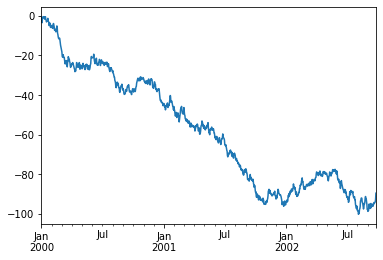

In [115]:
ts = pd.Series(np.random.randn(1000),
                        index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()


<Figure size 432x288 with 0 Axes>

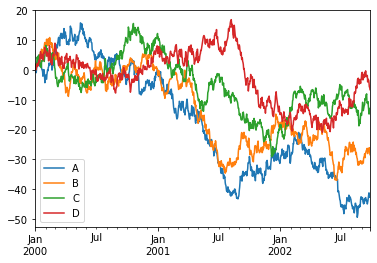

In [117]:
import matplotlib.pyplot as plt
# On a DataFrame, the plots() method is a convenience to plot all of the columns with labels
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                 columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure()
df.plot()
plt.legend(loc='best')

In [6]:
# Read data dari csv
data = pd.read_csv("data_training.csv")
data.head()

,Curvature,Diameter,QC
0,2.95,6.63,passed
1,2.53,7.79,passed
2,3.57,5.65,passed
3,3.57,5.45,passed
4,3.16,4.46,not_passed


In [23]:
# describe data
data.describe()

,Curvature,Diameter
count,7.000000,7.000000
mean,2.931429,5.674286
std,0.539735,1.405571
min,2.160000,3.520000
25%,2.555000,4.955000
50%,2.950000,5.650000
75%,3.365000,6.425000
max,3.570000,7.790000


In [15]:
# cek bentuk datanya
data.shape

(7, 3)

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing

# label encoder karena QC nya masih string (harus di ubah ke integer)
le = preprocessing.LabelEncoder()

# feature ata kolom yang di pakai buat prediksi
features = ['Curvature', 'Diameter']

x = data[features]
y = le.fit_transform(data.QC)

# split data
train_x, val_x, train_y, val_y = train_test_split(x, y, random_state=1)

# Gussian naive bayes
model = GaussianNB()
# fitting model
model.fit(train_x, train_y)
# prediction
prediction = model.predict(val_x)
# cek akurasi (datanya terlalu sedikit ga bisa di cek akurasinya wkwkwk)
mae = mean_absolute_error(prediction, val_y)

# read tes data
test_data = pd.read_csv("data_test.csv")

# mengambil kolom sesuai fitur yg di pakai untuk deskribsi
test_x = test_data[features]
# prediksi
test_preds = model.predict(test_x)
# output
output = pd.DataFrame({'curvature': test_data.Curvature,
                      'diameter': test_data.Diameter,
                      'Quality Control':test_preds})
print(output)



   curvature  diameter  Quality Control
0       2.81      5.46                0
